<hr/>

# Intro to Data Science

<hr/>

<h2><font color="darkblue">Exam 1</font></h2>

#### Deadline
Submit by 1:15pm on Blackboard. Don't wait till the last minute!

#### Python packages

Use only the `numpy` and `matplotlib` routines for calculations and plotting. 
You may also use the `pandas` package for data access and manipulation via the `DataFrame`, if needed.

####  Work alone!
Feel free to use the lecture notes and other resources but work on your own!  



### Problem 1

The attached [CSV](E1-Problem.csv) file contains 3 columns $(x,y,z)$ and hundreds of rows. Visualize and describe the dataset to gain some insight. 

1. Plot the 3-D dataset from different points of view to gain some insight (2 pts)
1. Calculate the sample averages of each column (2 pts)
1. Calculate the sample variances of each column (2 pts)
1. Calculate the skewness of each column (2 pts)
1. Calculate the covariances (2 pts)
1. Summarize your findings with your words (2 pts)

Total of 12 points

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [23]:
df = pd.read_csv("E1-Problem.csv")
data = df.values

#### Plot the 3-D dataset from different points of view to gain some insight (2 pts)

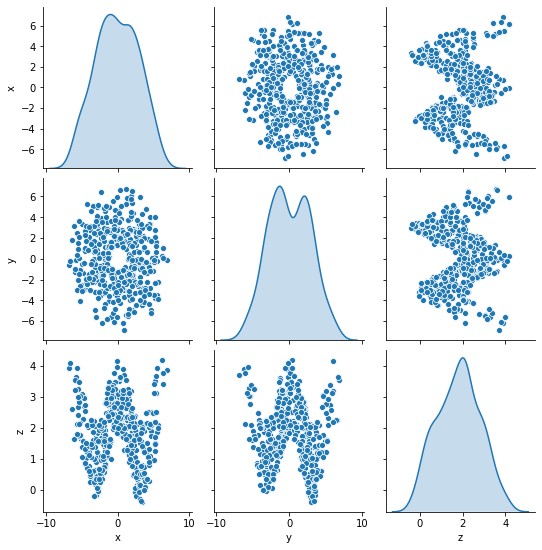

In [47]:
sns.pairplot(df, diag_kind='kde');

#### Calculate the sample averages of each column (2 pts)

In [31]:
def average(x):
    return np.sum(x) / len(x)

df.apply(np.mean, axis=0)

x   -0.069552
y    0.057702
z    1.821845
dtype: float64

#### Calculate the sample variances of each column (2 pts)

In [30]:
df.apply(np.var, axis=0)

x    8.730513
y    8.022111
z    0.997486
dtype: float64

#### Calculate the skewness of each column

In [33]:
def inner(data: np.ndarray):
    mu = np.mean(data)
    var = np.var(data)
    sigma = np.sqrt(var)
    return (data - mu) / sigma

def skewness(data: np.ndarray):
    scaled = inner(data)
    return np.mean(scaled**3)

df.apply(skewness, axis=0)

x   -0.027344
y    0.041151
z    0.003543
dtype: float64

#### Calculate the covariances

In [43]:
np.cov(df.values.T)

array([[ 8.75026563, -0.28731145, -0.12545239],
       [-0.28731145,  8.04026061, -0.07508138],
       [-0.12545239, -0.07508138,  0.99974285]])

#### Summarize findings

Looking down at the XY plane, the data appears mostly gaussian, with the notable exception of a lack of probability mass towards the center. Looking at the data on the XZ and YZ planes, it moves back and forth like a sin wave.

In 3D, this data would look somewhat like a DNA helix. It winds around the Z-axis, with no data in the center of the distribution.

There is very little variance along the Z-axis compared to the X and Y axis, and little covariance along any axis. Almost no skewness exists. The data all have values between 0 and 10.

## Problem 2

Use generalized linear regression to fit $z$ using the following family of functions, 

> $\displaystyle f(x,y;\boldsymbol{\beta}) = \sum_k \beta_k \,\phi_k(x,y)$
> <br>
> where
> <br>
> $\displaystyle \phi_0(x,y) = 1$
> <br>
> $\displaystyle \phi_1(x,y) = x$
> <br>
> $\displaystyle \phi_2(x,y) = y$
> <br>
> $\displaystyle \phi_3(x,y) = \sin(x)$
> <br>
> $\displaystyle \phi_4(x,y) = \cos(x)$
> <br>
> $\displaystyle \phi_5(x,y) = \sin(y)$
> <br>
> $\displaystyle \phi_6(x,y) = \cos(y)$


1. Construct the design matrix `X` from the given dataframe `df` for the above problem (3 pts)
2. Derive the best $\hat{\boldsymbol{\beta}}$ coefficients (3 pts)
3. Derive the estimated values $\hat{z}_i=f(x_i,y_i;\hat{\boldsymbol{\beta}})$ for each data point $i$ (2 pts)
3. Plot the histogram of the $\{(z_i\!-\!\hat{z}_i)\}$ residuals (2 pts)
4. Based on the best fit, estimate the $\hat{z}$ at the origin of the $x\!-\!y$ plane, i.e., calculate the $f(0,0;\hat{\boldsymbol{\beta}})$ value (3 pts)

Total of 13 points

#### Construct the design matrix X from the given dataframe df for the above problem (3 pts)

In [77]:
X = np.ones((df.shape[0], 7))

X[:, 1] = df.x
X[:, 2] = df.y
X[:, 3] = np.sin(df.x)
X[:, 4] = np.cos(df.x)
X[:, 5] = np.sin(df.y)
X[:, 6] = np.cos(df.y)

#### Derive the best  𝜷̂   coefficients

In [99]:
Xpinv = np.linalg.inv(X.T @ X) @ X.T
bHat = Xpinv @ df.z
bHat

array([ 1.99460272, -0.00685619, -0.00297905,  0.00894815,  1.01023589,
        0.01275613,  0.99395196])

#### Derive the estimated values  𝑧̂ 𝑖=𝑓(𝑥𝑖,𝑦𝑖;𝜷̂ )  for each data point  𝑖 

In [104]:
zhat = X @ bHat

zhat[:5]

array([0.2454635 , 2.85886713, 0.08930696, 2.0487284 , 0.88440455])

#### Plot the histogram of the  {(𝑧𝑖−𝑧̂ 𝑖)}  residuals

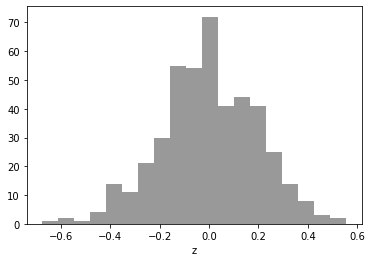

In [91]:
sns.distplot(df.z - zhat, hist=True, kde=False, color='k')

#### Based on the best fit, estimate the  𝑧̂   at the origin of the  𝑥−𝑦  plane, i.e., calculate the  𝑓(0,0;𝜷̂ )  value

In [106]:
Xnew = np.atleast_2d(np.array([1, 0, 0, np.sin(0), np.cos(0), np.sin(0), np.cos(0)]))
Xnew @ bHat

array([3.99879057])